In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import json
import seaborn as sns
sys.path.append('/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/')
#from src.utils.logger_functions import console
from src.cmos_plotter.Plotter_Helper_KV import *
from src.utils.metadata_functions import load_metadata_as_dataframe
from src.utils.logger_functions import console
from src.cmos_plotter import Conduction_speed_plotter as csp
import spikeinterface.extractors as se
import pickle
import matplotlib.pyplot as plt
from matplotlib import cm
import logging
# Silence just the matplotlib.font_manager logger
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

/usr/itetnas04/data-scratch-01/kvulic/data/conda_envs/old_sorter/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-03-26 10:24:12,132 Registering codec 'zlib'
2025-03-26 10:24:12,138 Registering codec 'gzip'
2025-03-26 10:24:12,155 Registering codec 'bz2'
2025-03-26 10:24:12,160 Registering codec 'lzma'
2025-03-26 10:24:12,462 Registering codec 'blosc'
2025-03-26 10:24:12,482 Registering codec 'zstd'
2025-03-26 10:24:13,043 Registering codec 'lz4'
2025-03-26 10:24:13,070 Registering codec 'astype'
2025-03-26 10:24:13,075 Registering codec 'delta'
2025-03-26 10:24:13,079 Registering codec 'quantize'
2025-03-26 10:24:13,091 Registering codec 'fixedscaleoffset'
2025-03-26 10:24:13,098 Registering codec 'packbits'
2025-03-26 10:24:13,101 Registering codec 'categorize'
2025-03-26 10:24:13,104 Registering 

In [2]:
MAIN_PATH = '/itet-stor/kvulic/neuronies/TANGO2'
rec_id = 1
RECORDINGS_PATH = os.path.join(MAIN_PATH,f'Recordings/Recordings_{rec_id}')
metadata = load_metadata_as_dataframe(file_path=RECORDINGS_PATH)
#metadata['Cell_Type'] = metadata['Filename'].apply(lambda x: x.split('_')[-1].split('.')[0])
#metadata.to_csv(os.path.join(RECORDINGS_PATH, 'metadata.csv'), index=False)
#metadata.to_excel(os.path.join(RECORDINGS_PATH, 'metadata.xlsx'), index=False)
metadata

2025-03-26 10:24:17,223 Metadata successfully loaded. 
 First 5 rows: 
                                             Filename  DIV  GBM_Type  Chip_ID  \
0  ID1103_N6_DIV7_DATE20240408_1631_spontaneous_C...    7       NaN     1103   
1  ID1103_11_DIV7_DATE20240408_1631_spontaneous_C...    7       NaN     1103   
2  ID1796_N8_DIV23_DATE20240425_1656_spontaneous_...   23       NaN     1796   
3  ID1103_11_DIV13_DATE20240415_1148_spontaneous_...   13       NaN     1103   
4  ID1796_N2_DIV17_DATE20240419_1217_spontaneous_...   17       NaN     1796   

  Network_ID         Type Cell_Type  
0         N6  spontaneous      CTRL  
1         11  spontaneous      CTRL  
2         N8  spontaneous       TO1  
3         11  spontaneous      CTRL  
4         N2  spontaneous       TO1  


,Filename,DIV,GBM_Type,Chip_ID,Network_ID,Type,Cell_Type
0,ID1103_N6_DIV7_DATE20240408_1631_spontaneous_C...,7,NaN,1103,N6,spontaneous,CTRL
1,ID1103_11_DIV7_DATE20240408_1631_spontaneous_C...,7,NaN,1103,11,spontaneous,CTRL
2,ID1796_N8_DIV23_DATE20240425_1656_spontaneous_...,23,NaN,1796,N8,spontaneous,TO1
3,ID1103_11_DIV13_DATE20240415_1148_spontaneous_...,13,NaN,1103,11,spontaneous,CTRL
4,ID1796_N2_DIV17_DATE20240419_1217_spontaneous_...,17,NaN,1796,N2,spontaneous,TO1
...,...,...,...,...,...,...,...
463,ID1731_N7_DIV25_DATE20240428_1657_spontaneous_...,25,NaN,1731,N7,spontaneous,CTRL
464,ID1731_N0_DIV13_DATE20240415_1218_spontaneous_...,13,NaN,1731,N0,spontaneous,CTRL
465,ID1103_N3_DIV11_DATE20240412_1034_spontaneous_...,11,NaN,1103,N3,spontaneous,CTRL
466,ID1747_N6_DIV7_DATE20240408_1601_spontaneous_T...,7,NaN,1747,N6,spontaneous,TO1


In [11]:
MAIN_PATH = '/itet-stor/kvulic/neuronies/gbm_project/1_Subprojects/Information_Capacity/Recordings/Patient_1'
#rec_id = 3
#RECORDINGS_PATH = os.path.join(MAIN_PATH,f'Recordings/Recordings_{rec_id}')
#SORTER_PATH = os.path.join(MAIN_PATH, f'Processed_Data/Recordings_{rec_id}/')
#CONDUCTION_SPEEDS_PATH = os.path.join(MAIN_PATH, f'Processed_Data/Conduction_speeds/Recordings_{rec_id}')
RECORDINGS_PATH = os.path.join(MAIN_PATH,f'Raw_Traces')
SORTER_PATH = os.path.join(MAIN_PATH, f'Processed_Data/ID1814_Patient1')
CONDUCTION_SPEEDS_PATH = '/itet-stor/kvulic/neuronies/kvulic_project1/00_temp_GA'

if not os.path.exists(CONDUCTION_SPEEDS_PATH):
    os.makedirs(CONDUCTION_SPEEDS_PATH)

metadata = load_metadata_as_dataframe(file_path=RECORDINGS_PATH)

2025-03-14 12:50:10,633 Metadata successfully loaded. 
 First 5 rows: 
                                             Filename  DIV  GBM_Type  Chip_ID  \
0  ID1820_N8_DIV51_DATE20240621_1112_spontaneous_...   51       NaN     1820   
1  ID1820_N1_DIV34_DATE20240604_1224_spontaneous_...   34       NaN     1820   
2  ID1820_N4_DIV44_DATE20240614_0837_spontaneous_...   44       NaN     1820   
3  ID1769_N0_DIV62_DATE20240702_0914_spontaneous_...   62       NaN     1769   
4  ID1814_N6_DIV75_DATE20240715_1105_spontaneous_...   75       NaN     1814   

  Network_ID         Type  
0         N8  spontaneous  
1         N1  spontaneous  
2         N4  spontaneous  
3         N0  spontaneous  
4         N6  spontaneous  


In [ ]:
#CHIP_ID = 1297
#DIV = 28


a = 0
results_combined = []
for idx, filename in enumerate(metadata.Filename):
    chip_id = metadata.loc[idx, 'Chip_ID']  # Get specific row values
    div = metadata.loc[idx, 'DIV']
    #cell_type = metadata.loc[idx, 'Cell_Type']
    cell_type = 'NGN2'
    try:
        print('Calculating conduction speeds for:', filename)
        recording = se.MaxwellRecordingExtractor(os.path.join(RECORDINGS_PATH, f'{filename}'))
        template_path = os.path.join(SORTER_PATH, f'Sorter_{filename}/wf_folder_curated/')
        
        # Get sampling rate
        sampling_rate = recording.get_sampling_frequency()
        # Get probe locations
        probe_locations = recording.get_channel_locations()
        # Extract templates
        templates = csp.load_and_extract_templates(template_path)
        # Analyze conduction speeds
        results = csp.analyze_conduction_speeds(templates, probe_locations, sampling_rate)
        
        # Add metadata and rename speed column for each result
        for result in results:
            result['speed_ms-1'] = result.pop('speed')  # Rename
            result['chip_id'] = chip_id
            result['div'] = div
            result['cell_type'] = cell_type
            result['filename'] = filename
            result['sampling_rate'] = sampling_rate
            result['probe_locations'] = probe_locations
            result['templates'] = templates
        
        
        if results is not None:
            results_combined.extend(results)
        else:
            console.info(f'No conduction speeds calculated for {filename}')
        


    except Exception as e:
        console.info(f'Could not calculate conduction speeds for {filename} due to the following error: {e}')
        continue

# Save results
with open(os.path.join(CONDUCTION_SPEEDS_PATH, 'Conduction_speeds_all.pkl'), 'wb') as f:
    pickle.dump(results_combined, f)

Calculating conduction speeds for: ID1814_N5_DIV65_DATE20240705_1119_spontaneous_Patient1.raw.h5


In [13]:
# Save the combined results at the end
with open(os.path.join(CONDUCTION_SPEEDS_PATH, f'All_conduction_speeds.pkl'), 'wb') as f:
    pickle.dump(results_combined, f)

#save results to csv
results_combined_df = pd.DataFrame(results_combined)
results_combined_df.to_csv(os.path.join(CONDUCTION_SPEEDS_PATH, f'All_conduction_speeds.csv'), index=False)
print("Done!")


Done!


In [14]:
results

[{'unit': 0,
  'direction': array([-0.05759842,  0.16955366]),
  'speed_ms-1': 0.3401388605326425,
  'chip_id': 1814,
  'div': 65,
  'cell_type': 'NGN2',
  'filename': 'ID1814_N5_DIV65_DATE20240705_1119_spontaneous_Patient1.raw.h5'},
 {'unit': 1,
  'direction': array([ 0.00175976, -0.15296581]),
  'speed_ms-1': 1.0644834428021852,
  'chip_id': 1814,
  'div': 65,
  'cell_type': 'NGN2',
  'filename': 'ID1814_N5_DIV65_DATE20240705_1119_spontaneous_Patient1.raw.h5'},
 {'unit': 2,
  'direction': array([0.01036938, 0.21032068]),
  'speed_ms-1': 0.9899494936611657,
  'chip_id': 1814,
  'div': 65,
  'cell_type': 'NGN2',
  'filename': 'ID1814_N5_DIV65_DATE20240705_1119_spontaneous_Patient1.raw.h5'},
 {'unit': 3,
  'direction': array([-0.10425394,  0.01506198]),
  'speed_ms-1': 0.5314033800043763,
  'chip_id': 1814,
  'div': 65,
  'cell_type': 'NGN2',
  'filename': 'ID1814_N5_DIV65_DATE20240705_1119_spontaneous_Patient1.raw.h5'},
 {'unit': 4,
  'direction': array([-0.0071487 ,  0.06861342]),
  '

2025-03-14 12:50:13,239 locator: <matplotlib.ticker.AutoLocator object at 0x7f493cfe4790>


2025-03-14 12:50:13,539 Assigning font /F1 = '/usr/share/fonts/truetype/msttcorefonts/Arial.ttf'
2025-03-14 12:50:13,598 Embedding font /usr/share/fonts/truetype/msttcorefonts/Arial.ttf.
2025-03-14 12:50:13,599 Writing TrueType font.
2025-03-14 12:50:13,722 locator: <matplotlib.ticker.AutoLocator object at 0x7f493cf45fc0>
2025-03-14 12:50:14,053 Assigning font /F1 = '/usr/share/fonts/truetype/msttcorefonts/Arial.ttf'
2025-03-14 12:50:14,113 Embedding font /usr/share/fonts/truetype/msttcorefonts/Arial.ttf.
2025-03-14 12:50:14,113 Writing TrueType font.
2025-03-14 12:50:14,230 locator: <matplotlib.ticker.AutoLocator object at 0x7f492c925330>
2025-03-14 12:50:14,531 Assigning font /F1 = '/usr/share/fonts/truetype/msttcorefonts/Arial.ttf'
2025-03-14 12:50:14,590 Embedding font /usr/share/fonts/truetype/msttcorefonts/Arial.ttf.
2025-03-14 12:50:14,590 Writing TrueType font.
2025-03-14 12:50:14,767 locator: <matplotlib.ticker.AutoLocator object at 0x7f492d84ace0>
2025-03-14 12:50:15,061 Assi

[(<Figure size 1000x800 with 3 Axes>,
  (<Axes: title={'center': 'Unit 0 Template'}, xlabel='Time (ms)', ylabel='Amplitude'>,
   <Axes: title={'center': 'Unit 0 Propagation'}, xlabel='X Position (μm)', ylabel='Y Position (μm)'>)),
 (<Figure size 1000x800 with 3 Axes>,
  (<Axes: title={'center': 'Unit 1 Template'}, xlabel='Time (ms)', ylabel='Amplitude'>,
   <Axes: title={'center': 'Unit 1 Propagation'}, xlabel='X Position (μm)', ylabel='Y Position (μm)'>)),
 (<Figure size 1000x800 with 3 Axes>,
  (<Axes: title={'center': 'Unit 2 Template'}, xlabel='Time (ms)', ylabel='Amplitude'>,
   <Axes: title={'center': 'Unit 2 Propagation'}, xlabel='X Position (μm)', ylabel='Y Position (μm)'>)),
 (<Figure size 1000x800 with 3 Axes>,
  (<Axes: title={'center': 'Unit 3 Template'}, xlabel='Time (ms)', ylabel='Amplitude'>,
   <Axes: title={'center': 'Unit 3 Propagation'}, xlabel='X Position (μm)', ylabel='Y Position (μm)'>)),
 (<Figure size 1000x800 with 3 Axes>,
  (<Axes: title={'center': 'Unit 4 Tem

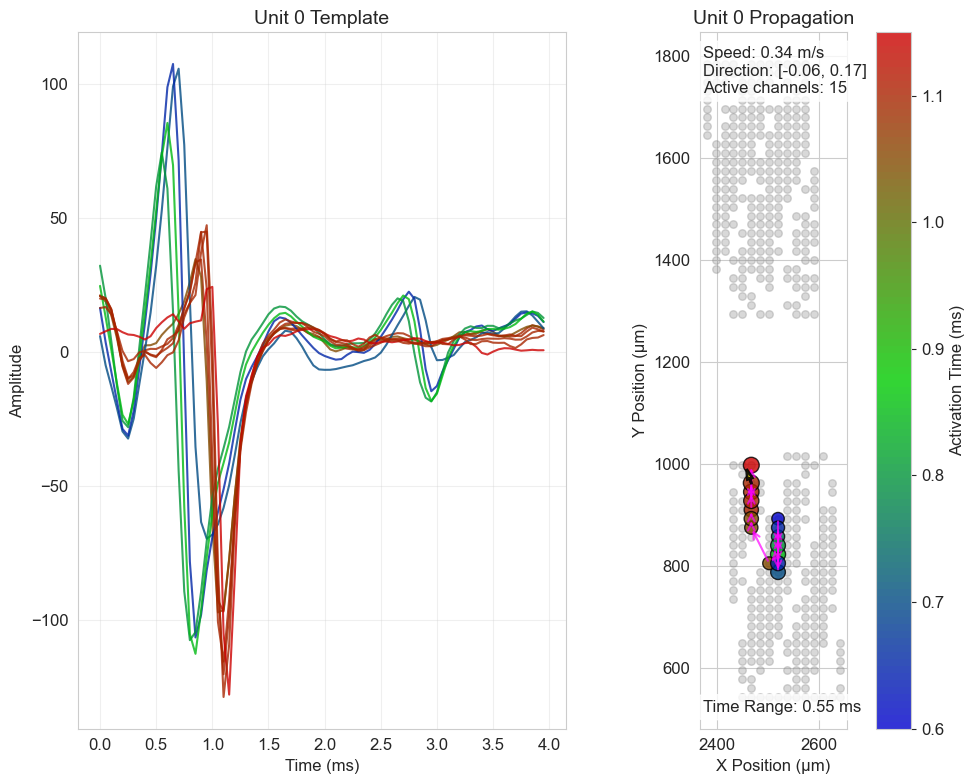

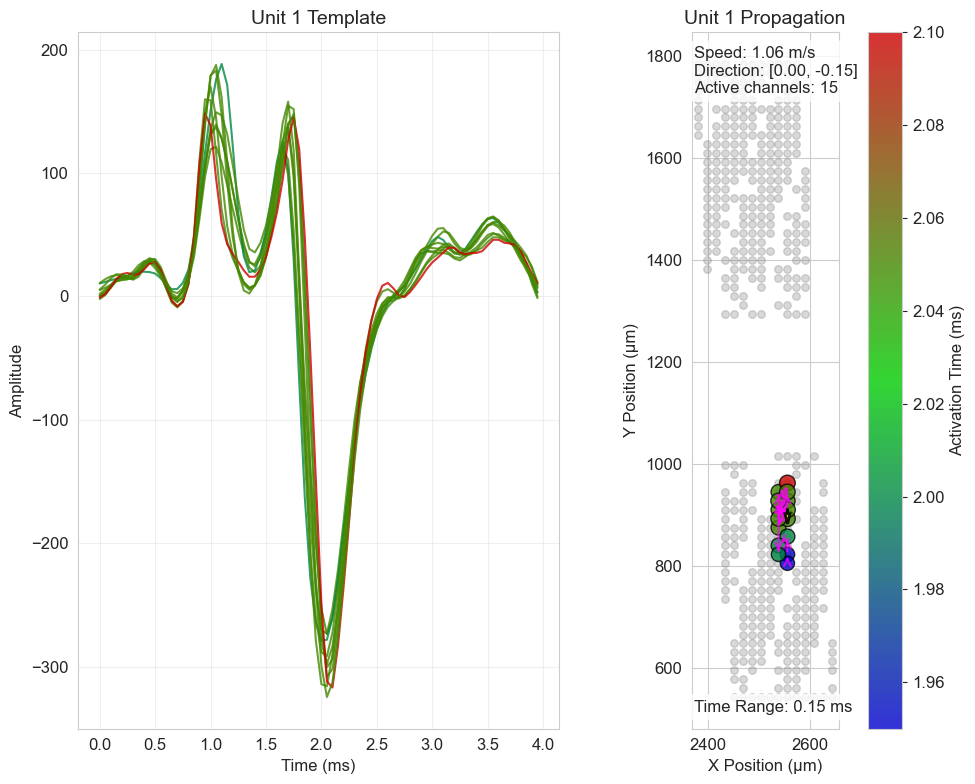

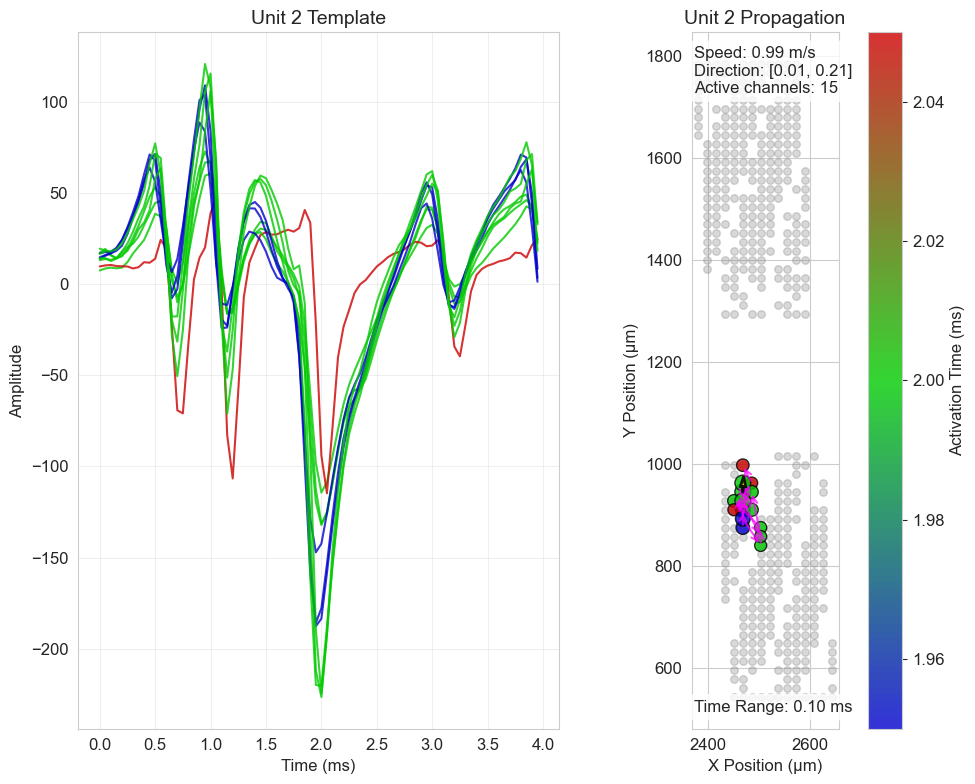

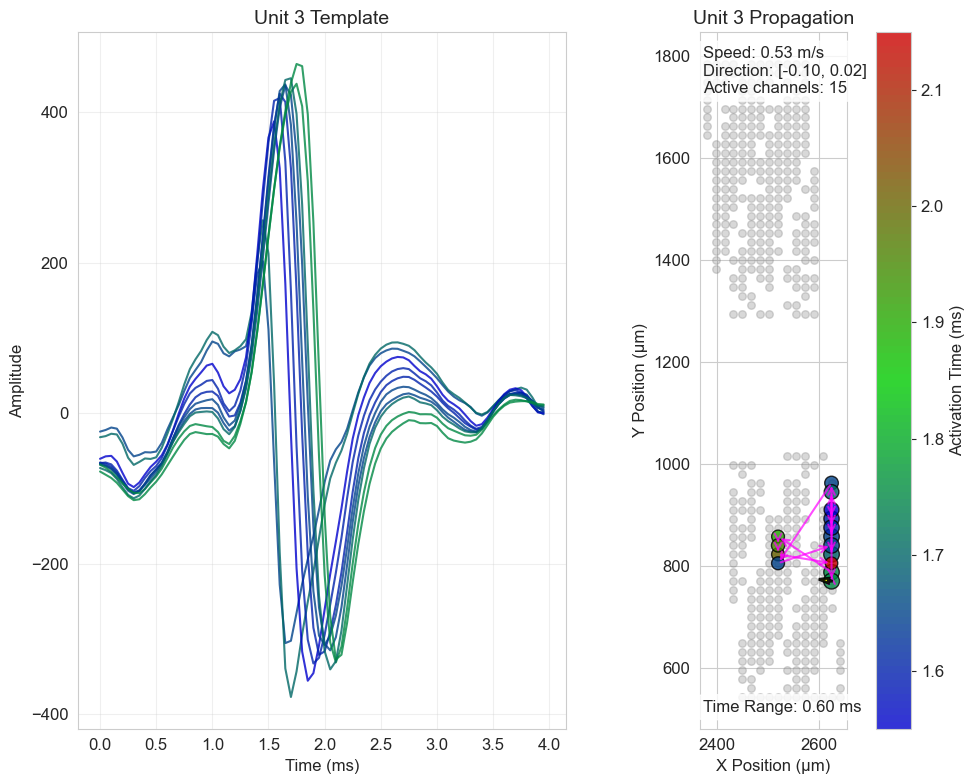

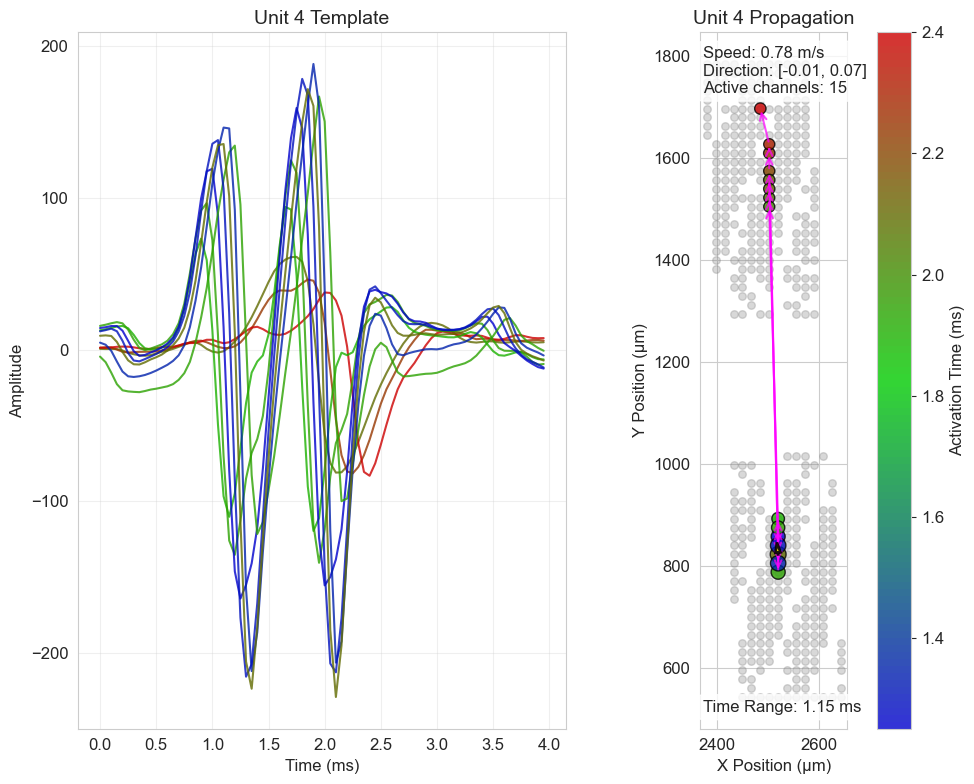

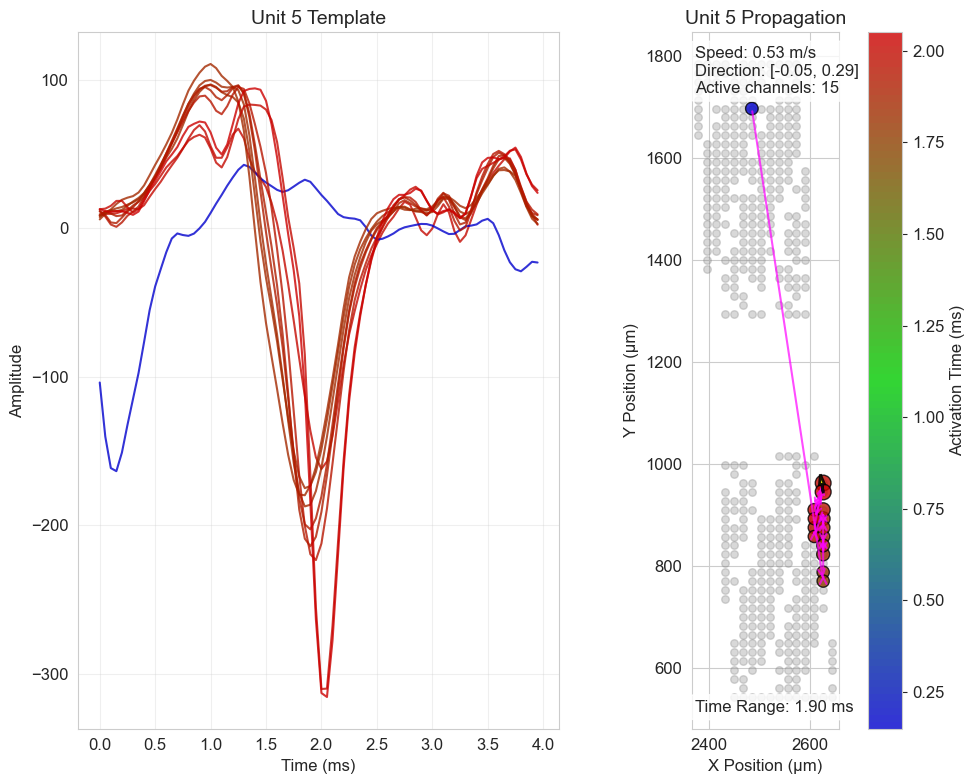

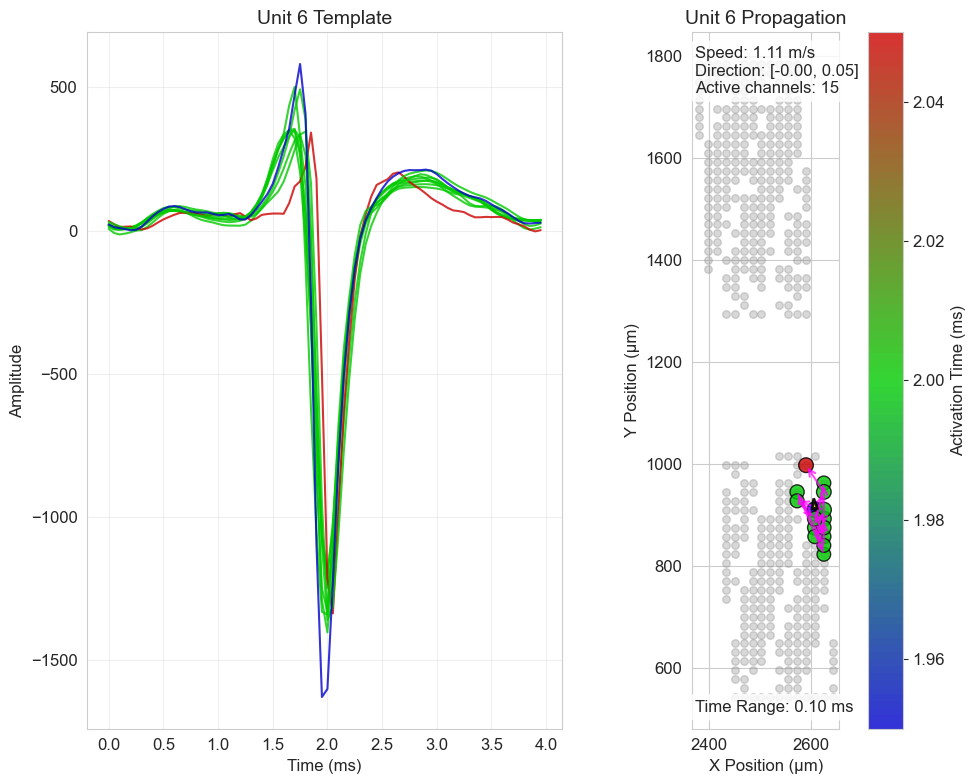

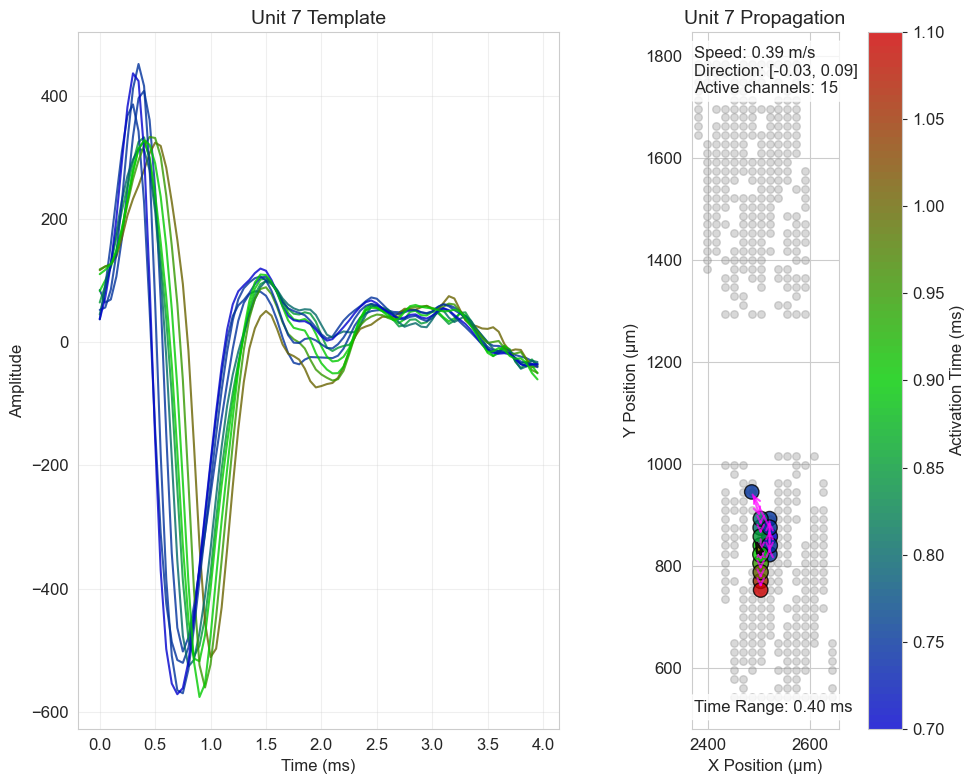

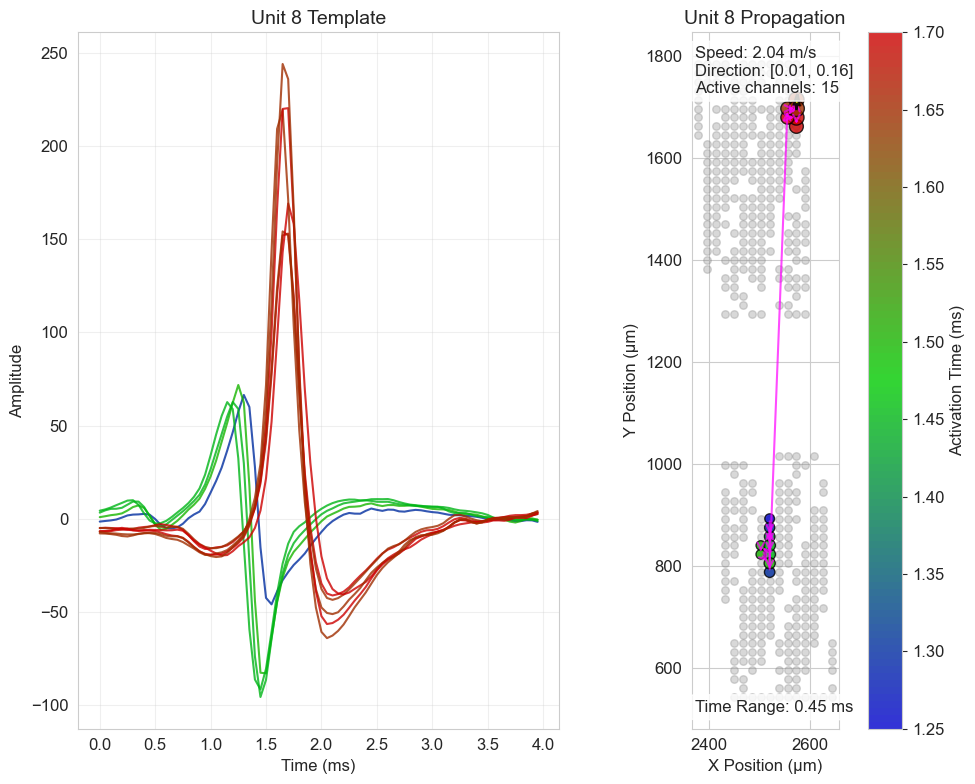

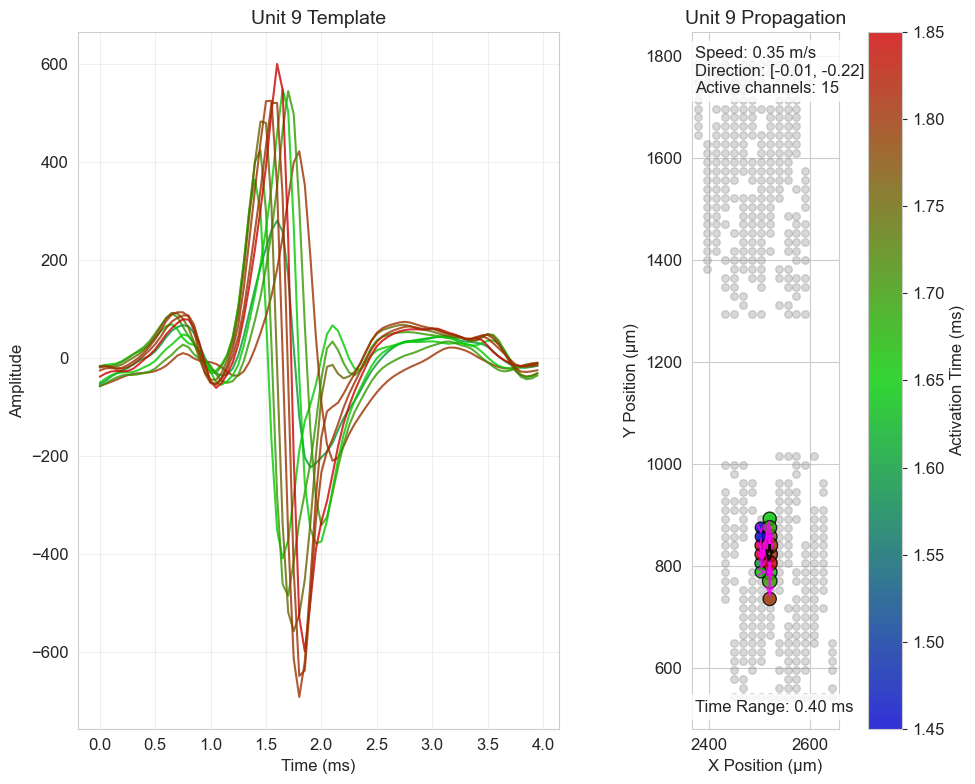

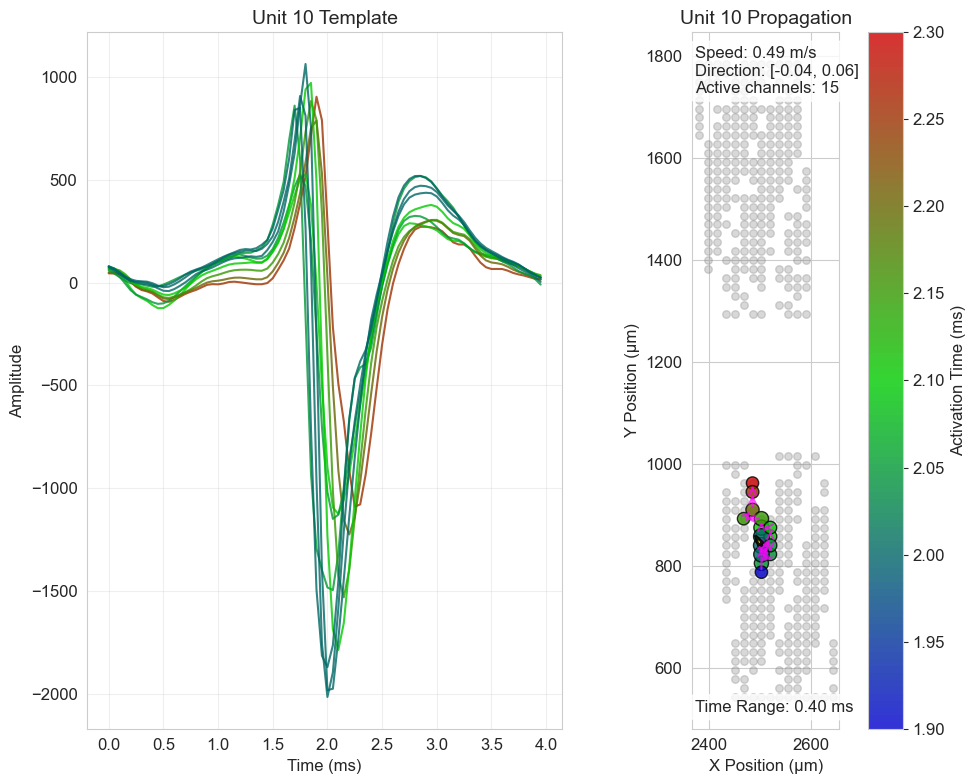

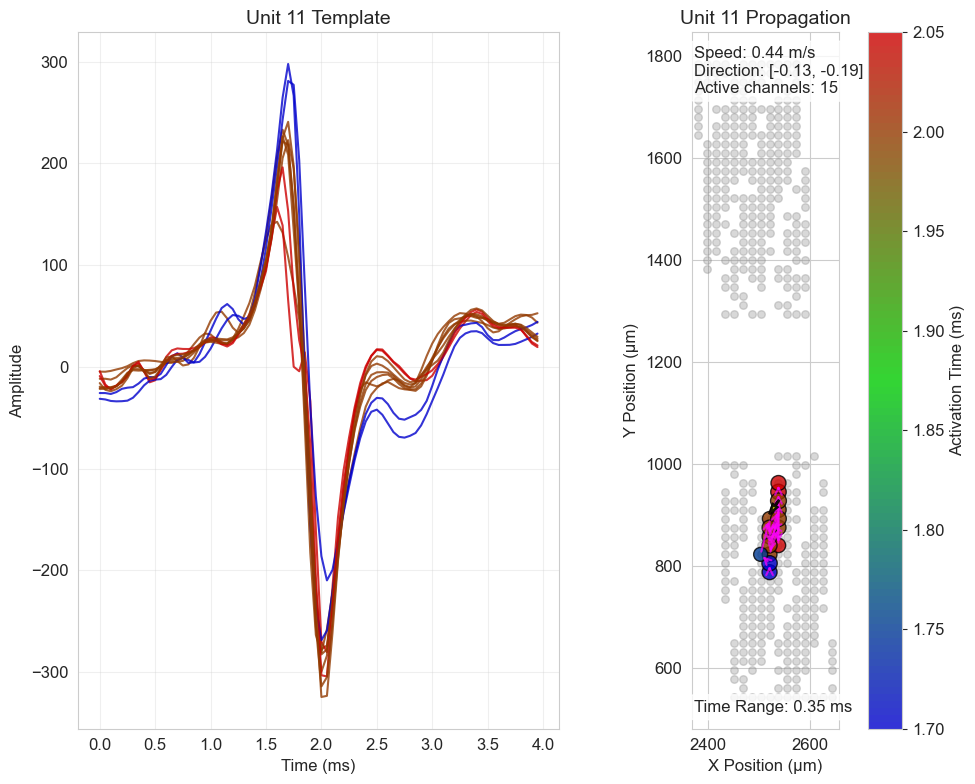

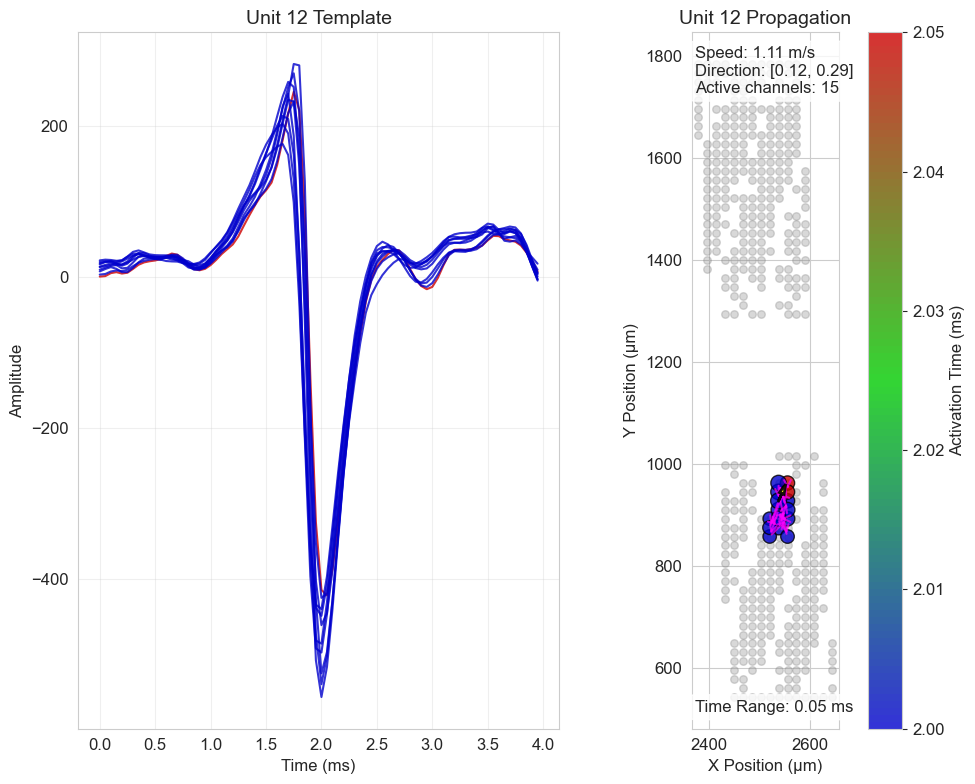

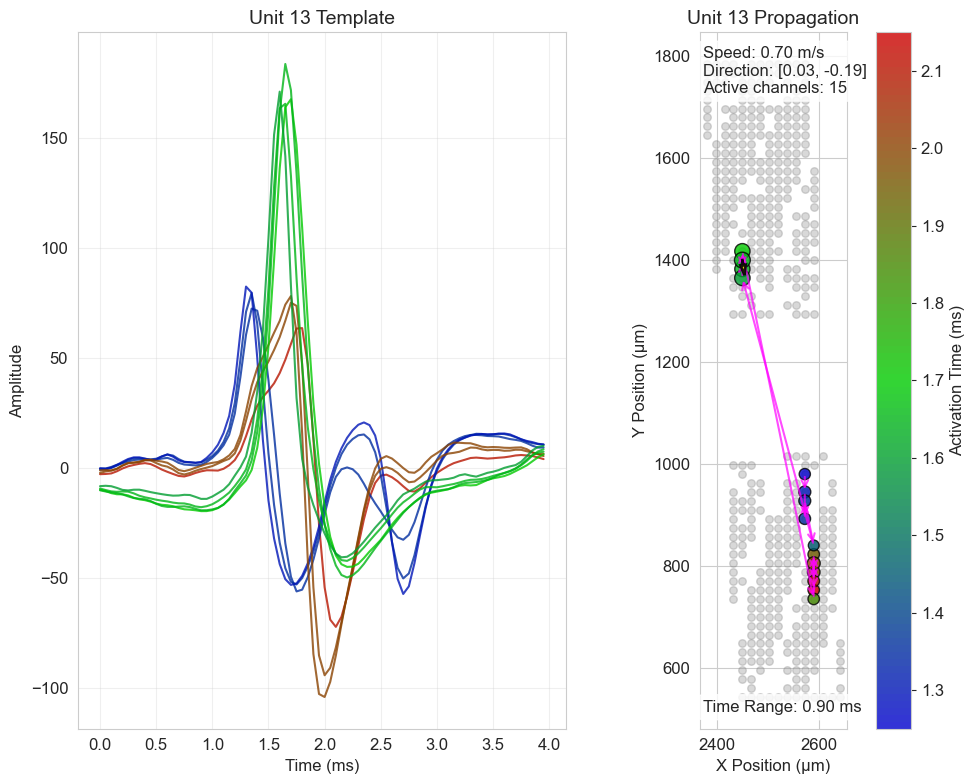

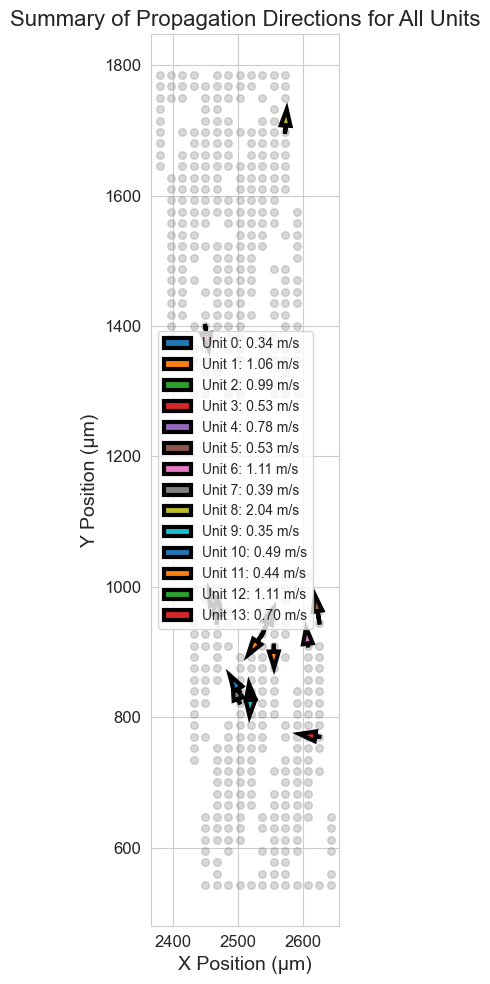

In [15]:
csp.visualize_unit_propagation_V2(CONDUCTION_SPEEDS_PATH, filename, results, templates, probe_locations, 
                              sampling_rate, figsize=(10, 8), fontsize=12, unit_ids=None)

In [8]:
results

[{'unit': 0,
  'direction': array([-0.01266012, -0.18017506]),
  'chip_id': 1986,
  'div': 21,
  'cell_type': 'CTRL',
  'filename': 'ID1986_N5_DIV21_DATE20241114_1319_spontaneous_B5_CTRL.raw.h5',
  'speed': 0.3245917656072058},
 {'unit': 1,
  'direction': array([-0.05838988,  0.15622408]),
  'chip_id': 1986,
  'div': 21,
  'cell_type': 'CTRL',
  'filename': 'ID1986_N5_DIV21_DATE20241114_1319_spontaneous_B5_CTRL.raw.h5',
  'speed': 1.4691438121983702},
 {'unit': 2,
  'direction': array([0.01594631, 0.01671955]),
  'chip_id': 1986,
  'div': 21,
  'cell_type': 'CTRL',
  'filename': 'ID1986_N5_DIV21_DATE20241114_1319_spontaneous_B5_CTRL.raw.h5',
  'speed': 0.5249999999999998},
 {'unit': 3,
  'direction': array([-0.03741057, -0.52702553]),
  'chip_id': 1986,
  'div': 21,
  'cell_type': 'CTRL',
  'filename': 'ID1986_N5_DIV21_DATE20241114_1319_spontaneous_B5_CTRL.raw.h5',
  'speed': 0.2532631914502044},
 {'unit': 4,
  'direction': array([0.02452994, 0.06617976]),
  'chip_id': 1986,
  'div': 2

2025-03-13 16:53:48,491 Assigning font /F1 = '/usr/share/fonts/truetype/msttcorefonts/Arial.ttf'
2025-03-13 16:53:48,563 Embedding font /usr/share/fonts/truetype/msttcorefonts/Arial.ttf.
2025-03-13 16:53:48,564 Writing TrueType font.


[(<Figure size 1400x1000 with 4 Axes>,
  (<Axes: title={'center': 'Mean Conduction Speed by Unit'}, xlabel='Unit ID (sorted by speed)', ylabel='Mean Conduction Speed (m/s)'>,
   <Axes: title={'center': 'Distribution of Mean Speeds'}, xlabel='Mean Conduction Speed (m/s)', ylabel='Count'>,
   <Axes: title={'center': 'Speed by Unit Index'}, xlabel='Unit Index', ylabel='Mean Conduction Speed (m/s)'>,
   <Axes: title={'center': 'Speed Distribution by Unit'}, xlabel='Unit (sorted by mean speed)', ylabel='Conduction Speed (m/s)'>))]

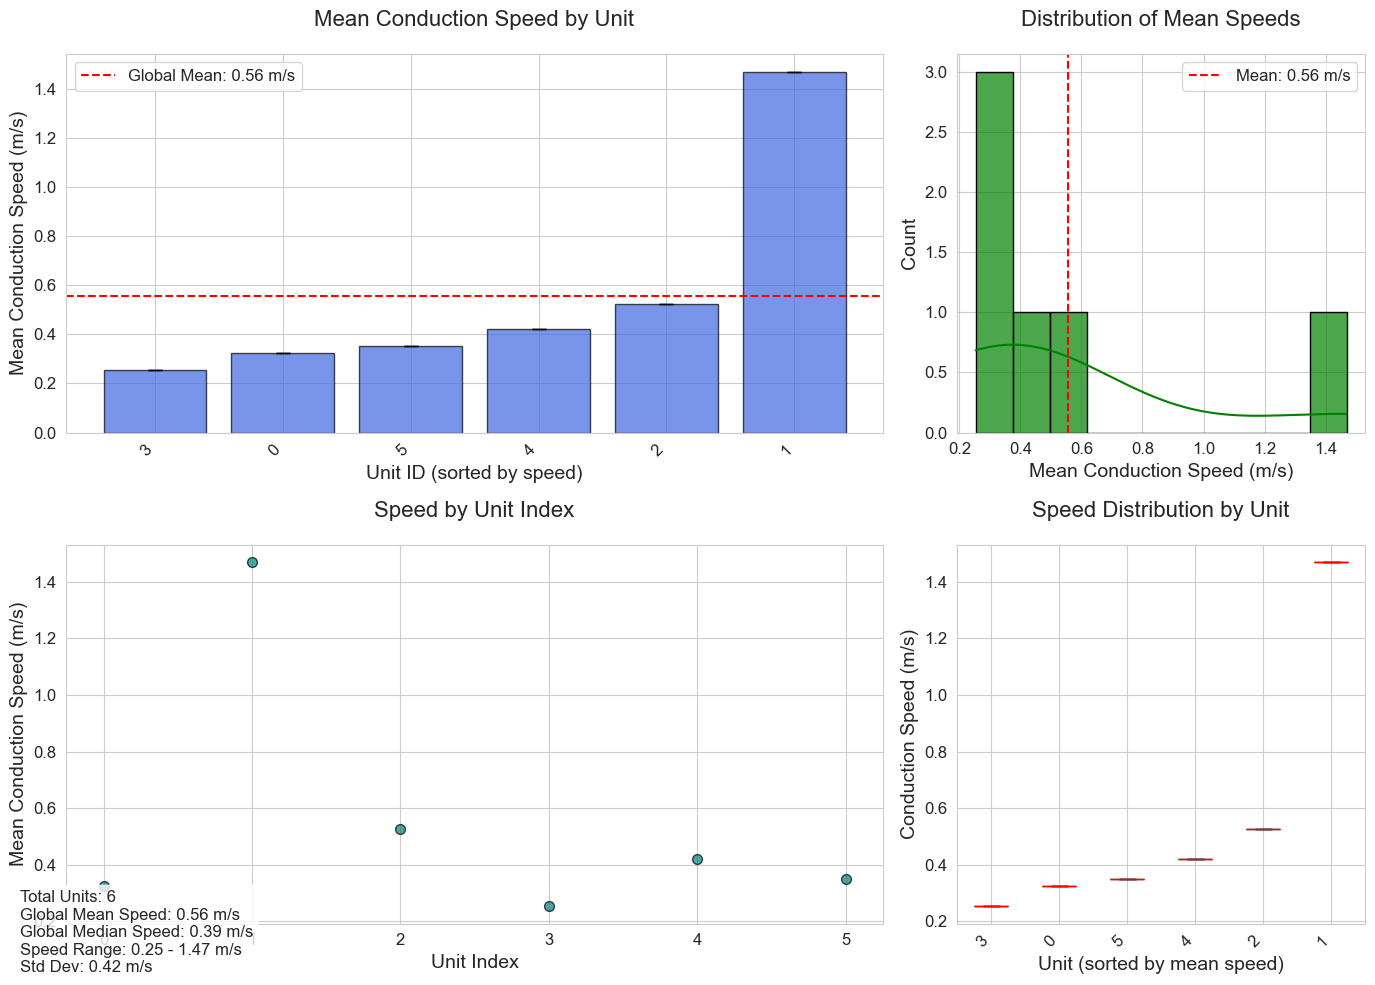

In [9]:
csp.visualize_unit_speed_distribution(CONDUCTION_SPEEDS_PATH, filename, results, unit_properties=None)

In [3]:
OUTPUT_PATH = '/itet-stor/kvulic/neuronies/TANGO2/Processed_Data/Conduction_speeds'

In [4]:
data = pd.read_csv(os.path.join(OUTPUT_PATH, f'Conduction_speeds_all.csv'))
#remove rows where speed is larger than 5 m/s
#data = data[data['speed_ms-1'] < 5]
#data[(data.cell_type == 'TO1-B5') & (data.div == 30)]
data = data[data['div'] <= 28]

2025-03-25 16:42:22,609 Assigning font /F1 = '/usr/share/fonts/truetype/msttcorefonts/Arial.ttf'
2025-03-25 16:42:22,652 Embedding font /usr/share/fonts/truetype/msttcorefonts/Arial.ttf.
2025-03-25 16:42:22,652 Writing TrueType font.


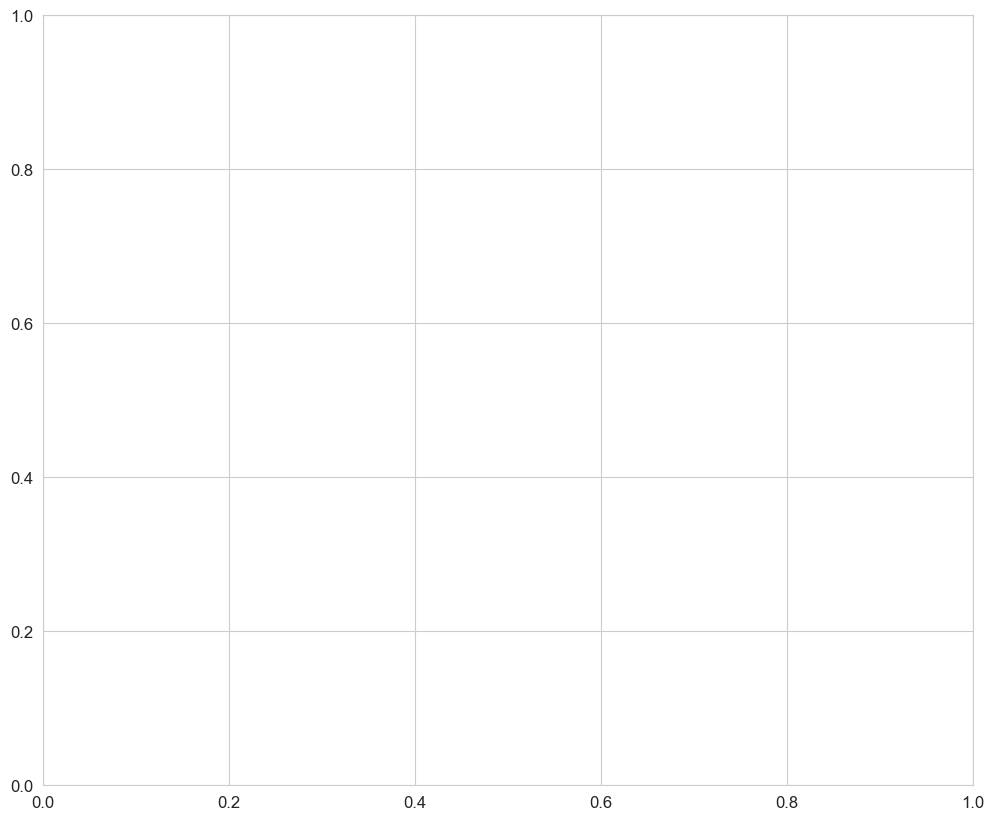

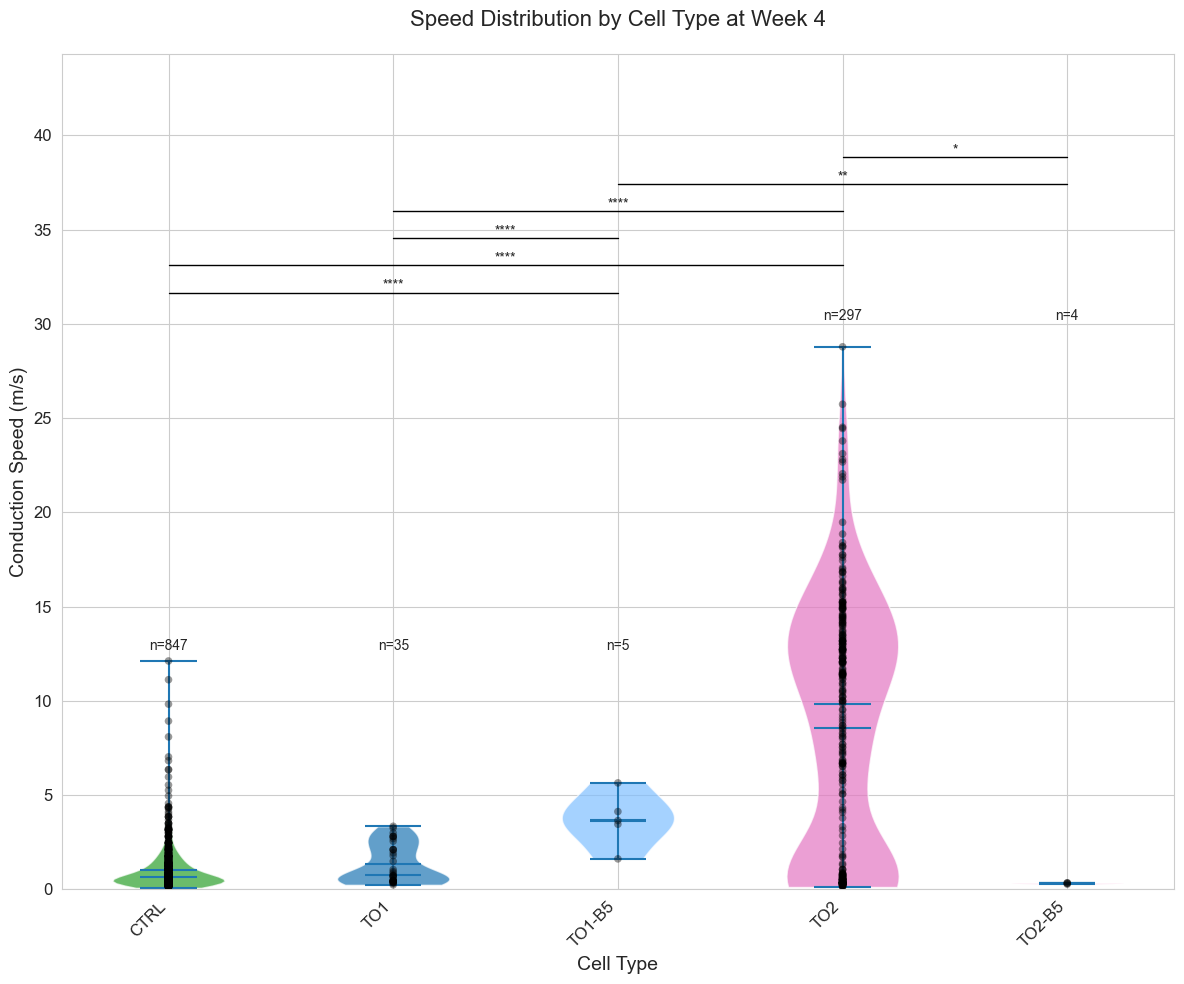

In [6]:
fig_1, fig_2 = csp.plot_simple_speed_div_analysis_w_test(OUTPUT_PATH, data, selected_div_group='Week 4')


(4.0, 6.0)

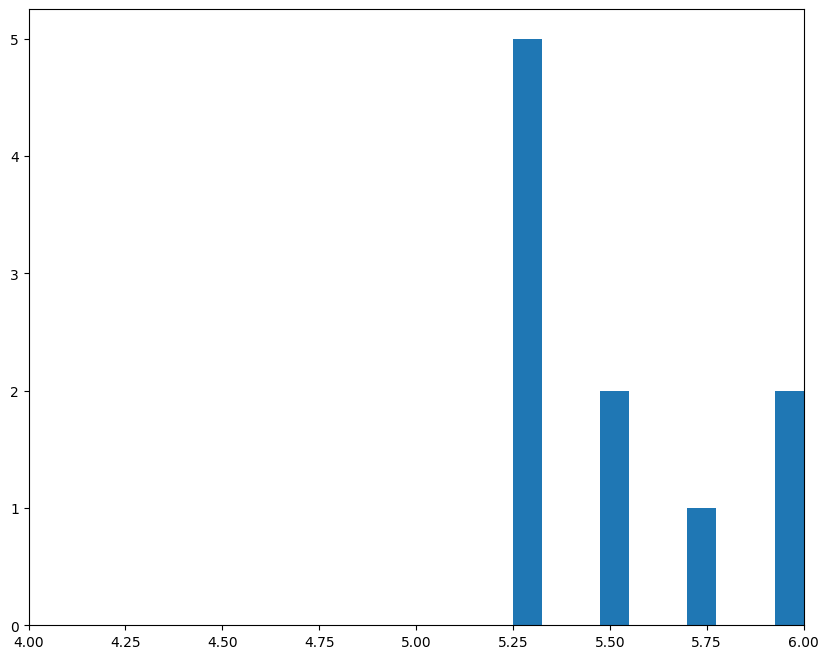

In [9]:
arr = [5.25,5.25,5.25,6.,6.,5.5,5.75,5.25,5.5,5.25]
plt.figure(figsize =  (10,8))
plt.hist(arr)
plt.xlim(4.0,6.0)